In [1]:
# from Lesson 3.05 
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics 

In [2]:
# custom imports
import mymetrics as m                    # my module, single function open
plt.style.use('gstyle.mplstyle')         # stylesheet for sns

pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [53]:
# import data from clean files, data folder
path = '../data/'
filename = 'clean_all.csv'

df_in = pd.read_csv( path+filename )

In [54]:
# all
df_all = df_in[['alley', 'frontage', 'bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch', 'screen porch', 'pool_sq', 'month', 'saleprice', 'full_b', 'tot_room_abv']]

In [55]:
# all numeric 
df_numeric = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch', 'screen porch', 'pool_sq', 'saleprice', 'full_b', 'tot_room_abv']]

##### Benchmark, Model 1: 
* no scaling
* no dummies 
* no categorical 

Intercept: -39398.2800199193
Slope: 21.04125818813212
Linear Regression Metrics:
      Metric         Value
0         r2  7.036000e-01
1        rss  3.399605e+12
2      max_e  5.576359e+05
3       rmse  4.276363e+04
4        mae  1.828728e+09
5        mse  1.828728e+09
6  intercept -3.939828e+04
7      slope  2.104126e+01
8     r2xval  6.890000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.718130
1   Ridge Test  0.667926
2  LASSO Train  0.721551
3   LASSO Test  0.662791


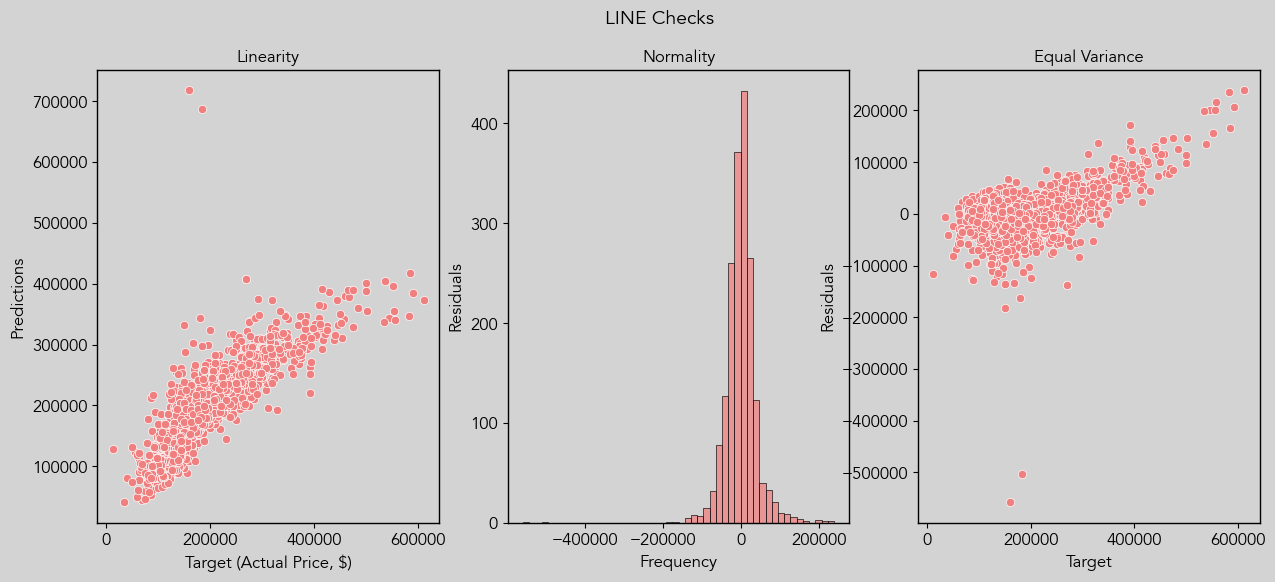

In [7]:
X = df_numeric.drop(columns=['saleprice'])
y = df_numeric['saleprice']

# running my first model calling function from my module
# returns list of metrics 
metrics_1 = m.allmet(X, y);

### Model 1 Results
* no scaling
* no dummies 
* no categorical 
* `quality = 1`

Metric     | Value
---         | --- 
R2          | 0.703 from linear model 
Ridge Train   |0.718130
Ridge Test  |0.667926
LASSO Train  |0.721551
LASSO Test  |.662791
Intercept: |-39398.2800199193
Slope:      |21.04125818813212

Ridge and LASSO regularization improve model slightly for train data, but generalize poorly to new/ test data.


#### Model 2: 
* using standard scalar for all numeric data, errors were same, no effect on model: <br ><br>


Model   | Feature Engineering           | R2        | R2, X-val     | RMSE          | Slope         | Intercept             
---     | ---                           | ---       | ---           | ---           | ---           | ---    
1       | All Numeric                   | 0.7241    | 0.7109        | 41317         | 19.94344      | -1364941
2       | Standard Scalar               | 0.7241    | 0.7109        | 41317         | 19.94344      | -1364941


#### Model 3:  using only numeric metrics, including frontage, 

Intercept: -43415.438414239936
Slope: 21.664030332975223
Linear Regression Metrics:
      Metric         Value
0         r2  7.041000e-01
1        rss  3.393087e+12
2      max_e  5.916406e+05
3       rmse  4.272261e+04
4        mae  1.825222e+09
5        mse  1.825222e+09
6  intercept -4.341544e+04
7      slope  2.166403e+01
8     r2xval  6.895000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.723668
1   Ridge Test  0.659099
2  LASSO Train  0.726989
3   LASSO Test  0.652372


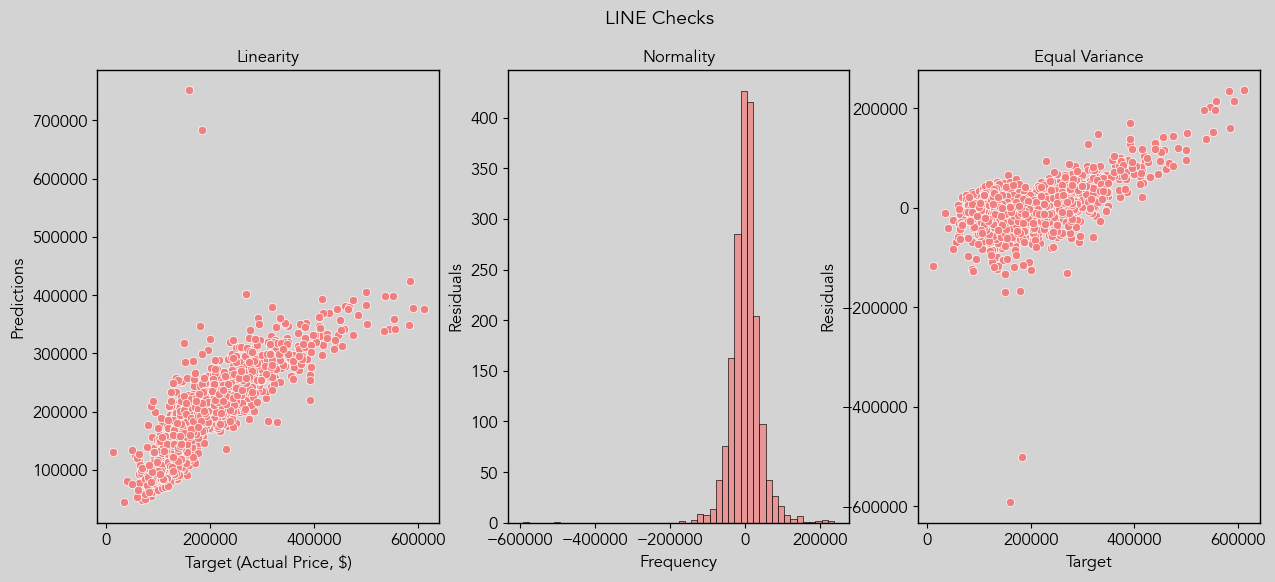

In [9]:
 df_front = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch', 'screen porch', 'pool_sq', 'saleprice', 'full_b','frontage']]

X = df_front.drop(columns=['saleprice'])
y = df_front['saleprice']

metrics_3 = m.allmet(X, y);

### Model 3 Results: Marginally Better, still poor, still overfit. 
Metric     | Value
---         | --- 
R2          | 0.704 from linear model 
Ridge Train   |0.723668
Ridge Test  |0.659099
LASSO Train  |0.726989
LASSO Test  |0.652372


Model   | Feature Engineering           | R2        | R2, X-val     | RMSE          | Slope         | Intercept             
---     | ---                           | ---       | ---           | ---           | ---           | ---    
1       | All Numeric                   | 0.7241    | 0.7109        | 41317         | 19.94344      | -1364941
2       | Standard Scalar               | 0.7241    | 0.7109        | 41317         | 19.94344      | -1364941
3       | Included `frontage`    | 0.7398   | 0.7174    | 41875 | -24.2397  | -1123871

## Model 4: 
Using the correalation, I am reassesing all variables with less than 0.3, and dummifying selected categoricals, deteremind from EDA. 

variable        | description | 
---             | ---
garage_area     | in sq ft
1f_sf           | 1st floor area, in sq ft
bsmt_sf         | basement area, in sq ft
full_b          | full bathroom
half_b          | half bathroom
tot_room_abv    | total # of rooms above ground level
veneer_a        | total surface area of property covered with veneer
qual            | subjective assesment of home quality - may treat this as categorical 
type            | CATEGORICAL: property type; townhouse, single family
month           | CATEGORICAL: will dummify
zoning          | CATEGORICAL: will dummify 
fireplaces      | numerical 
garage_cars     | numerical

In [38]:
# running garage capacity and fireplace as numeric 

df_4 = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch','saleprice', 'full_b', 'tot_room_abv', 'frontage', 'zoning', 'month', 'type', 'qual']]

X4_dummy = pd.get_dummies(df_4, columns=['zoning', 'month', 'type'], drop_first=True)

Intercept: -103836.07028322108
Slope: 23.652624748554047
Linear Regression Metrics:
      Metric         Value
0         r2  7.964000e-01
1        rss  2.335066e+12
2      max_e  5.722675e+05
3       rmse  3.544132e+04
4        mae  1.256087e+09
5        mse  1.256087e+09
6  intercept -1.038361e+05
7      slope  2.365262e+01
8     r2xval  7.841000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.812777
1   Ridge Test  0.761232
2  LASSO Train  0.813976
3   LASSO Test  0.756621


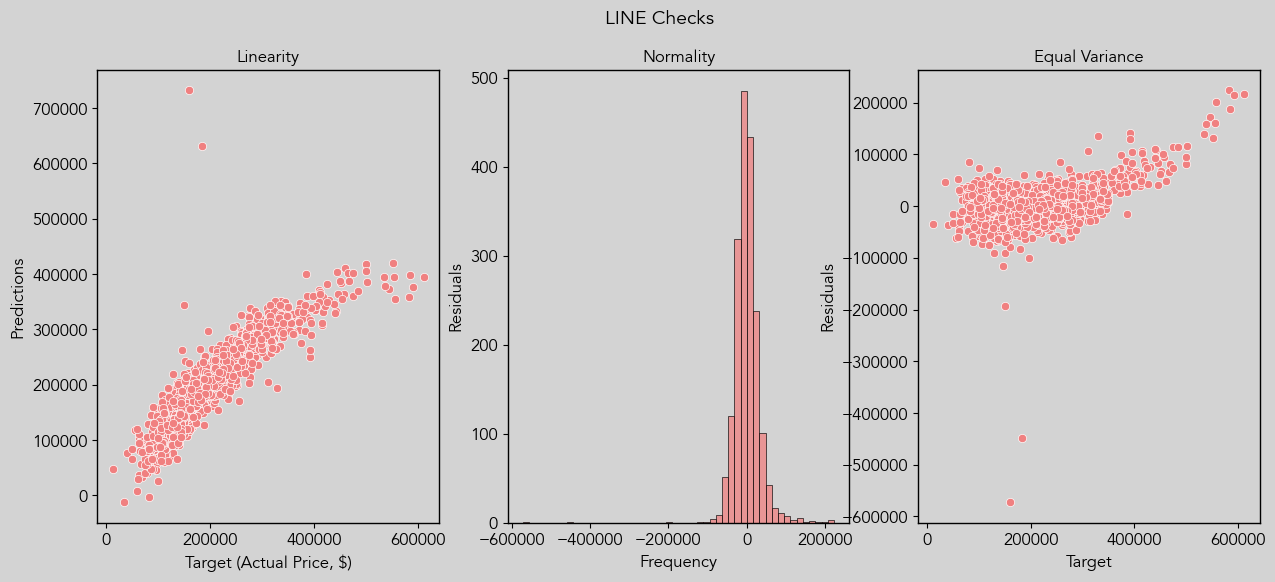

In [39]:
X4 = X4_dummy.drop(columns=['saleprice'])
y = X4_dummy['saleprice']

m.allmet(X4, y);

Intercept: -80888.4976278313
Slope: 21.399401429416933
Linear Regression Metrics:
      Metric         Value
0         r2  8.148000e-01
1        rss  2.123758e+12
2      max_e  5.121380e+05
3       rmse  3.379970e+04
4        mae  1.142420e+09
5        mse  1.142420e+09
6  intercept -8.088850e+04
7      slope  2.139940e+01
8     r2xval  7.990000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.826529
1   Ridge Test  0.789846
2  LASSO Train  0.827789
3   LASSO Test  0.785481


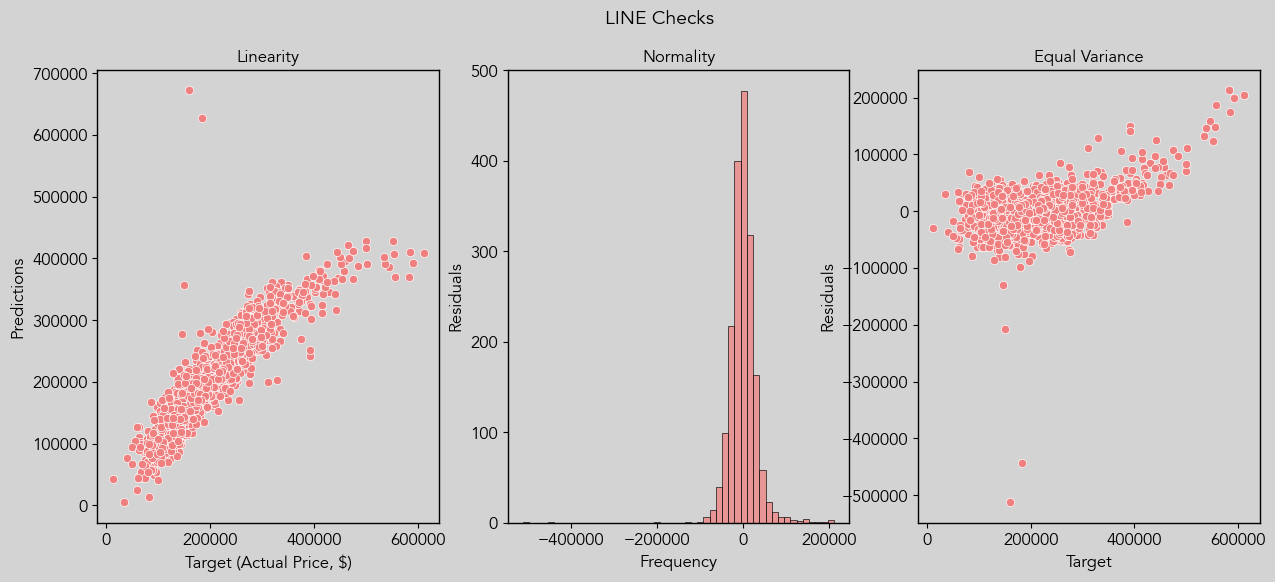

In [40]:
#running as garage and fireplace CATEGORICAL
X5_dummy = pd.get_dummies(df_4, columns=['zoning', 'month', 'type', 'fireplaces', 'garage_cars'], drop_first=True)

X5 = X5_dummy.drop(columns=['saleprice'])
y = X5_dummy['saleprice']

m.allmet(X5, y);

#### Model 4 vs. 5 RESULTS: 
Both `model 4` and `model 5` used the same variables (in table above), but dummifying `fireplace` and `garage car capacity` actually increased R values, as well as variance

Model  | Feature Engineering              | R2        | R2, X-val     | RMSE          |Ridge Train    | Ridge Test      | Lasso Train  | Laso Test       
---    | ---                              | ---       | ---           | ---           | ---           | ---    | ---  | --- 
4      | `22` Garage, Fireplace as NUMERIC     | 0.7964    | 0.7841        | 35 441        | 0.8127        | 0.761         | 0.814      | 0.756621
5      | `22` Garage, Fireplace as CATEGORICAL | 0.8148     | 0.799         | 33 799       | 0.8277          | 0.7898    | 0.8278    | 0.7854


### Model 6, 7: 

The next models will include utilities, which must be dummified. 

Intercept: -74582.47666308196
Slope: 21.24755553329334
Linear Regression Metrics:
      Metric         Value
0         r2  8.193000e-01
1        rss  2.071713e+12
2      max_e  5.137343e+05
3       rmse  3.338298e+04
4        mae  1.114423e+09
5        mse  1.114423e+09
6  intercept -7.458248e+04
7      slope  2.124756e+01
8     r2xval  8.016000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.831030
1   Ridge Test  0.794491
2  LASSO Train  0.832776
3   LASSO Test  0.789031


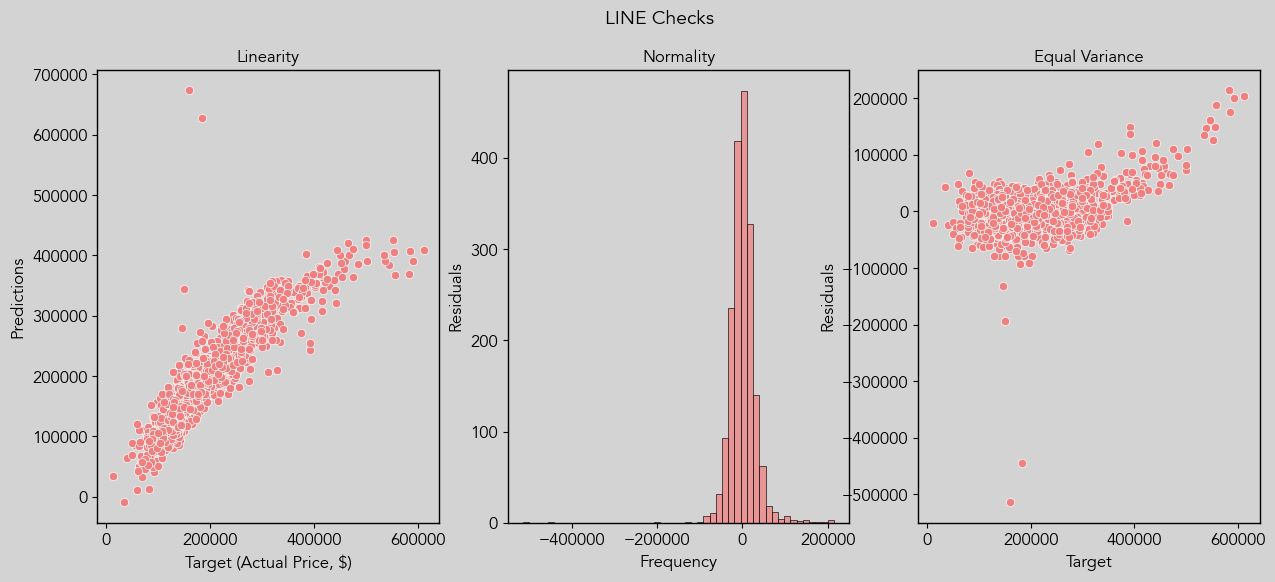

In [41]:
# Model 6: UTILITIES 

df_6 = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch','saleprice', 'full_b', 'tot_room_abv', 'frontage', 'zoning', 'month', 'type', 'qual', 
    'heat_qc', 'cent_air', 'electrical', 'utilities']]

X6_dummy = pd.get_dummies(df_6, columns=['zoning', 'month', 'type', 'fireplaces', 'garage_cars', 
    'heat_qc', 'cent_air', 'electrical', 'utilities'], drop_first=True)

X6 = X6_dummy.drop(columns=['saleprice'])
y = X6_dummy['saleprice']

m.allmet(X6, y);

Intercept: -3551.07661989145
Slope: 19.335118861107066
Linear Regression Metrics:
      Metric         Value
0         r2  8.405000e-01
1        rss  1.828703e+12
2      max_e  5.006441e+05
3       rmse  3.136403e+04
4        mae  9.837023e+08
5        mse  9.837023e+08
6  intercept -3.551077e+03
7      slope  1.933512e+01
8     r2xval  8.199000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.853029
1   Ridge Test  0.809910
2  LASSO Train  0.855340
3   LASSO Test  0.807116


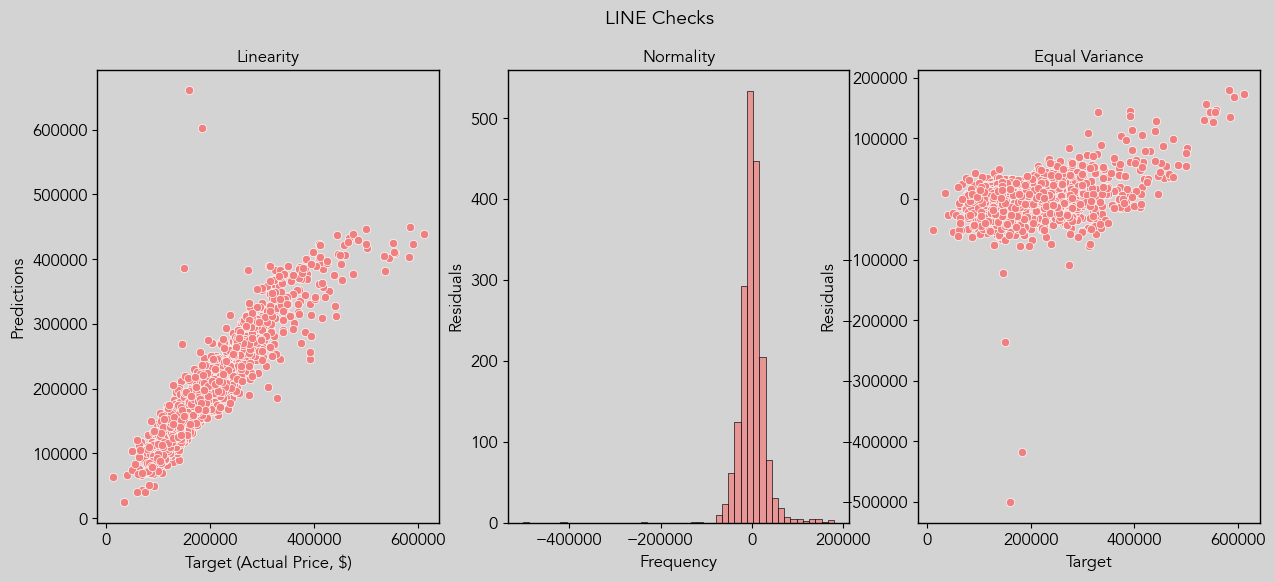

In [42]:
# Model 7: QUAL as CATEGORICAL

df_6 = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch','saleprice', 'full_b', 'tot_room_abv', 'frontage', 'zoning', 'month', 'type', 'qual', 
    'heat_qc', 'cent_air', 'electrical', 'utilities']]

X7_dummy = pd.get_dummies(df_6, columns=['zoning', 'month', 'type', 'fireplaces', 'garage_cars', 
    'heat_qc', 'cent_air', 'electrical', 'utilities', 'qual'], drop_first=True)

X7 = X7_dummy.drop(columns=['saleprice'])
y = X7_dummy['saleprice']

m.allmet(X7, y);

#### Model 6 vs. 7 RESULTS: 
`4` additional features (regarding utilities) marginally improved the model. However, running `qual` as `categorical` rather than `numerical` increased R2, decreased bias after Ridge and LASSO regularization, and also decreased RMSE. 

Model| Feature Engineering              | R2        | R2, X-val     | RMSE          |Ridge Train    | Ridge Test      | Lasso Train  | Laso Test       
---  | ---                              | ---       | ---           | ---           | ---           | ---    | ---  | --- 
4    | `22` Garage, Fireplace as NUMERIC     | 0.7964    | 0.7841        | 35 441        | 0.8127        | 0.761         | 0.814      | 0.756621
5    | `22` Garage, Fireplace as CATEGORICAL | 0.8148     | 0.799         | 33 799       | 0.8277          | 0.7898    | 0.8278    | 0.7854
6    | `26` Utilities, categorical   | 0.8193 | 0.8016 | 33 829 | 0.8310 | 0.7945 | 0.832 | 0.7890
7 | `26` QUALITY as CATEGORICAL |  0.8405| 0.8199 | 31 364 | 0.8530 | 0.8099 | 0.8553 | 0.8071 


#### Model 8 and 9: 
For the next iterations, I will add alley and frontage, features for which I filled in `Nan`, and porch features for model 9. 

Intercept: -4628.399124080432
Slope: 19.02934177629829
Linear Regression Metrics:
      Metric         Value
0         r2  8.409000e-01
1        rss  1.824971e+12
2      max_e  5.006765e+05
3       rmse  3.133201e+04
4        mae  9.816948e+08
5        mse  9.816948e+08
6  intercept -4.628399e+03
7      slope  1.902934e+01
8     r2xval  8.198000e-01
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.853355
1   Ridge Test  0.810102
2  LASSO Train  0.855756
3   LASSO Test  0.807250


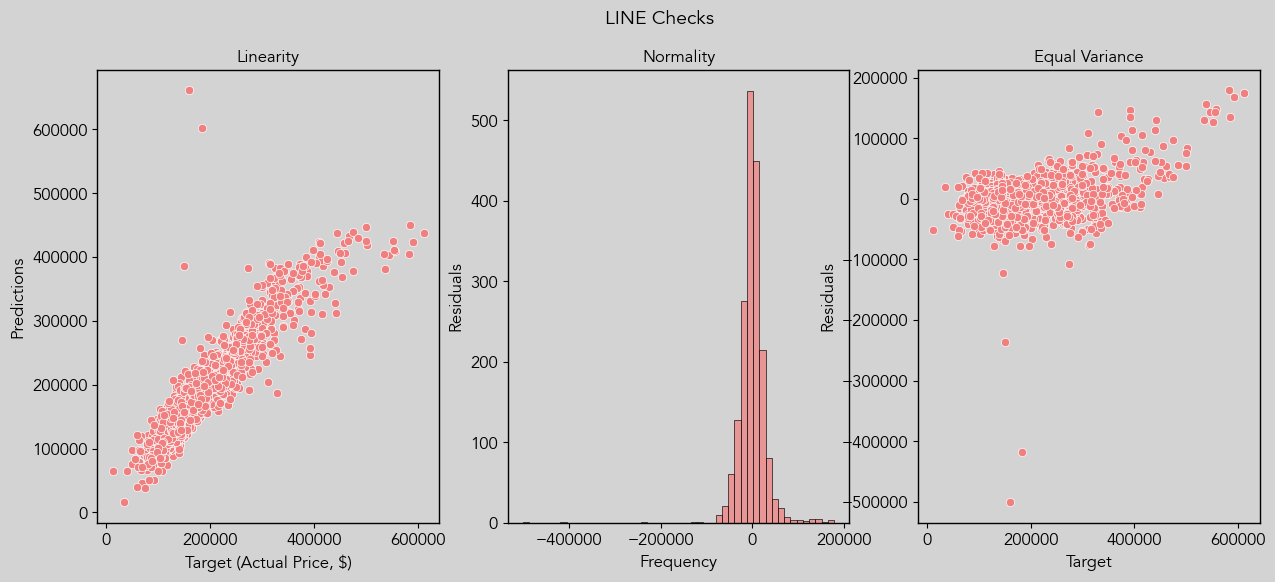

In [45]:
# Model 8: 
df_8 = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch','saleprice', 'full_b', 'tot_room_abv', 'frontage', 'zoning', 'month', 'type', 'qual', 
    'heat_qc', 'cent_air', 'electrical', 'utilities', 'frontage', 'alley']]

X8_dummy = pd.get_dummies(df_8, columns=['zoning', 'month', 'type', 'fireplaces', 'garage_cars', 
    'heat_qc', 'cent_air', 'electrical', 'utilities', 'qual', 'alley'], drop_first=True)

X8 = X8_dummy.drop(columns=['saleprice'])
y = X8_dummy['saleprice']

m.allmet(X8, y);

Intercept: -1919.6247542878264
Slope: 18.300144552290963
Linear Regression Metrics:
      Metric         Value
0         r2  8.458000e-01
1        rss  1.768459e+12
2      max_e  4.752113e+05
3       rmse  3.084308e+04
4        mae  9.512957e+08
5        mse  9.512957e+08
6  intercept -1.919625e+03
7      slope  1.830014e+01
8     r2xval -1.937462e+03
Ridge and LASSO Scores
        Metric     Value
0  Ridge Train  0.857126
1   Ridge Test  0.817186
2  LASSO Train  0.859314
3   LASSO Test  0.815258


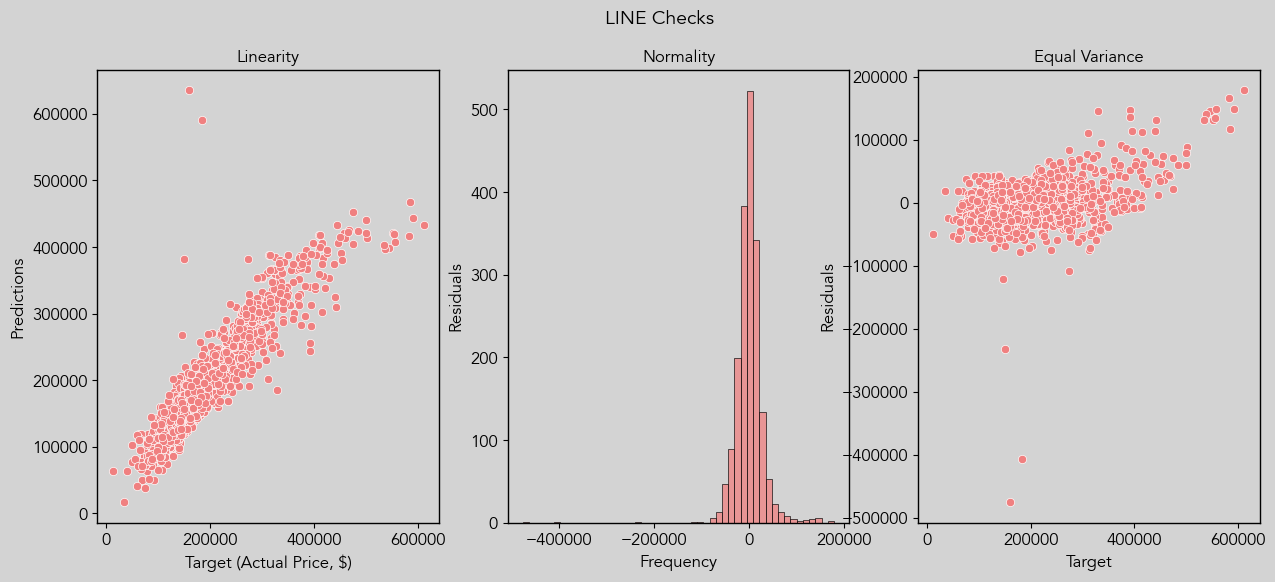

In [51]:
# Model 9: porch/deck features. 
df_9 = df_in[['bsmt_sf1', '1f_sf', '2f_sf', 'grla_sf', 'bsmt_fullb', 'full_b', 'half_b', 
    'tot_room_abv', 'fireplaces', 'garage_cars', 'garage_a', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch','saleprice', 'full_b', 'tot_room_abv', 'frontage', 'zoning', 'month', 'type', 'qual', 
    'heat_qc', 'cent_air', 'electrical', 'utilities', 'frontage', 'alley', 'wood_dk_sf', 'open_porch_sf', 
    'enclosed_porch', 'screen porch']]

X9_dummy = pd.get_dummies(df_9, columns=['zoning', 'month', 'type', 'fireplaces', 'garage_cars', 
    'heat_qc', 'cent_air', 'electrical', 'utilities', 'qual', 'alley'], drop_first=True)

X9 = X9_dummy.drop(columns=['saleprice'])
y = X9_dummy['saleprice']

m.allmet(X9, y);

#### Model 8, model 9 RESULTS: 
Additional features are marginally increasing model performance. 

Model| # Feature Engineering              | R2        | R2, X-val     | RMSE          |Ridge Train    | Ridge Test      | Lasso Train  | Laso Test       
---  | ---                              | ---       | ---           | ---           | ---           | ---    | ---  | --- 
4    | `22` Garage, Fireplace as NUMERIC     | 0.7964    | 0.7841        | 35 441        | 0.8127        | 0.761         | 0.814      | 0.756621
5    | `22` Garage, Fireplace as CATEGORICAL | 0.8148     | 0.799         | 33 799       | 0.8277          | 0.7898    | 0.8278    | 0.7854
6    | `26` Utilities, categorical   | 0.8193 | 0.8016 | 33 829 | 0.8310 | 0.7945 | 0.832 | 0.7890
7 | `26` QUALITY as CATEGORICAL |  0.8405| 0.8199 | 31 364 | 0.8530 | 0.8099 | 0.8553 | 0.8071 
8 | `28` frontage + alley | 0.8409 | 0.8198 | 31 332 | 0.8533 | 0.8101 | 0.8557 | 0.8072
9 | `32` porch features | 0.8458 | - negative? | 30 843 | 0.8571 | 0.8171 | 0.8593 | 0.8152